In [ ]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import confusion_matrix, classification_report

Training set shape: (54000, 28, 28)
Validation set shape: (6000, 28, 28)
Test set shape: (10000, 28, 28)


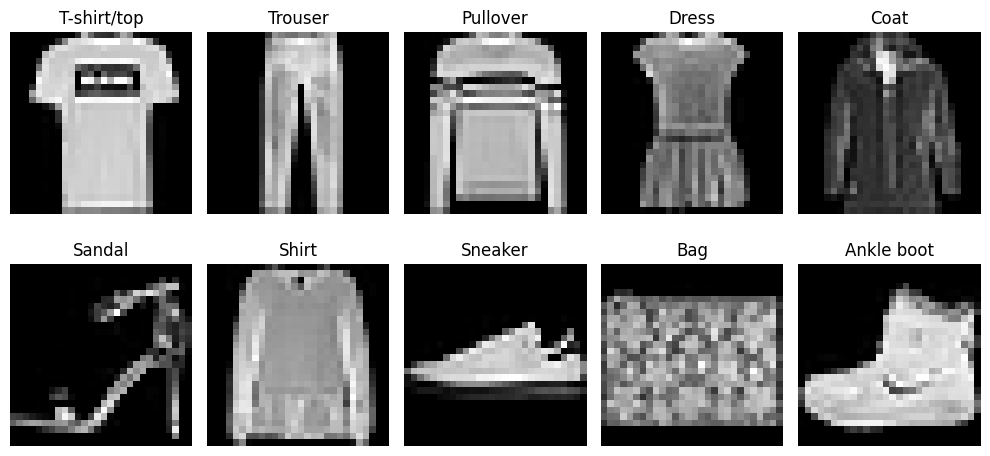

In [ ]:
# Load the dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full)

# Print shapes
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)


# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Visualize one sample from each class
plt.figure(figsize=(10, 5))
for class_id in range(10):
    idx = np.where(y_train_full == class_id)[0][0]
    plt.subplot(2, 5, class_id + 1)
    plt.imshow(x_train_full[idx], cmap='gray')
    plt.title(class_names[class_id])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode
y_train_oh = to_categorical(y_train, num_classes=10)
y_val_oh = to_categorical(y_val, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# Reshape image data to include a single channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6614 - loss: 2791.1982 - val_accuracy: 0.7790 - val_loss: 862.3202
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7685 - loss: 1333.5952 - val_accuracy: 0.7988 - val_loss: 852.8088
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7809 - loss: 1260.3534 - val_accuracy: 0.8208 - val_loss: 742.3194
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7795 - loss: 1311.4402 - val_accuracy: 0.5763 - val_loss: 4017.1206
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7922 - loss: 1203.7526 - val_accuracy: 0.7612 - val_loss: 1093.9526
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7939 - loss: 1134.2288 - val_accuracy: 0.8008 - val_loss: 1009.7062
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7944 - loss: 1184.4004 - val_accuracy: 0.8040 - val_loss: 830.4177
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 

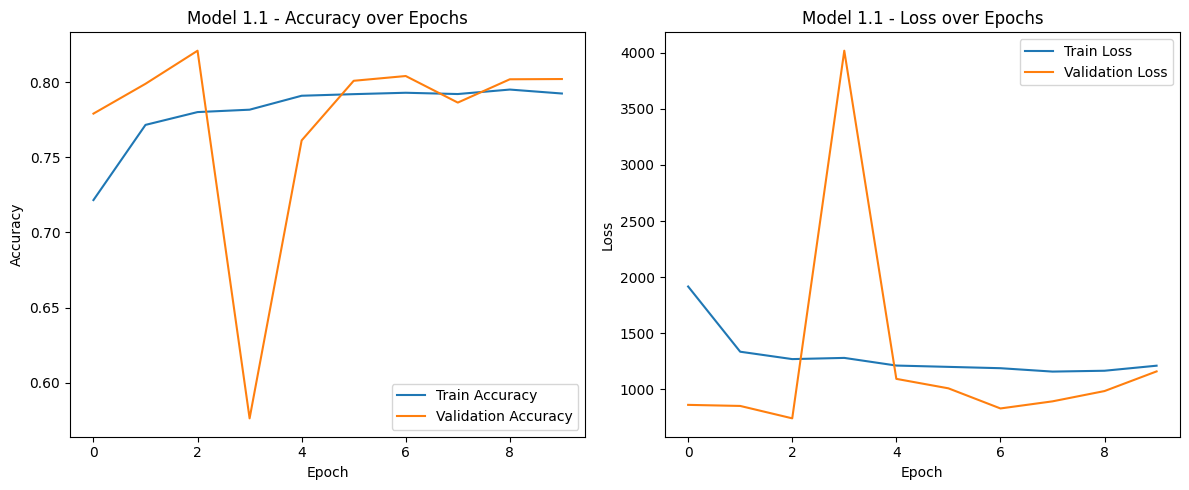


Model 1.1 Test Accuracy: 0.7885000109672546


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


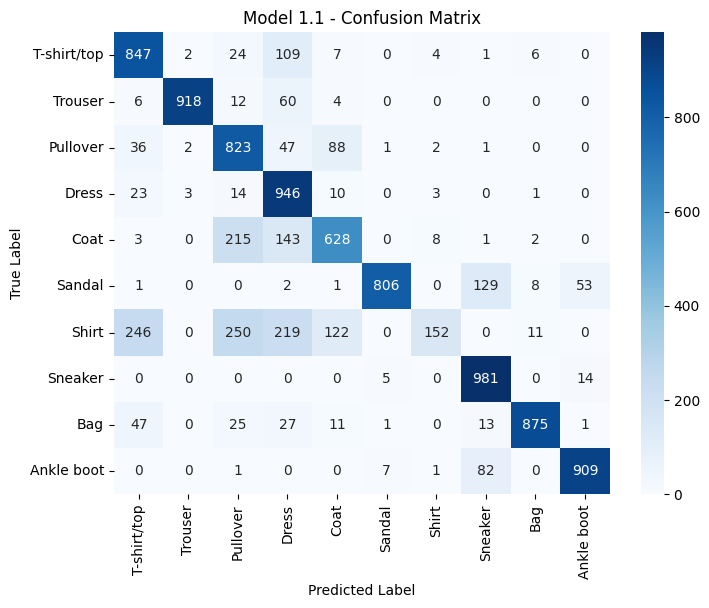



Classification Report for Model 1.1:

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.85      0.77      1000
     Trouser       0.99      0.92      0.95      1000
    Pullover       0.60      0.82      0.70      1000
       Dress       0.61      0.95      0.74      1000
        Coat       0.72      0.63      0.67      1000
      Sandal       0.98      0.81      0.89      1000
       Shirt       0.89      0.15      0.26      1000
     Sneaker       0.81      0.98      0.89      1000
         Bag       0.97      0.88      0.92      1000
  Ankle boot       0.93      0.91      0.92      1000

    accuracy                           0.79     10000
   macro avg       0.82      0.79      0.77     10000
weighted avg       0.82      0.79      0.77     10000



In [ ]:
# Build Model 1.1
model1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='softmax')
])

# Compile model 1.1
model1.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Summary
model1.summary()
print("\n")

# Train model 1.1
history1 = model1.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1.1 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1.1 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss1, test_accuracy1 = model1.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 1.1 Test Accuracy: {test_accuracy1}")
print("\n")

# Predict class labels
y_pred1 = model1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm1 = confusion_matrix(y_true_classes, y_pred_classes1)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 1.1 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 1.1:\n")
print(classification_report(y_true_classes, y_pred_classes1, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7087 - loss: 0.8807 - val_accuracy: 0.8285 - val_loss: 0.5065
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8306 - loss: 0.5084 - val_accuracy: 0.8508 - val_loss: 0.4461
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8427 - loss: 0.4641 - val_accuracy: 0.8468 - val_loss: 0.4424
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8496 - loss: 0.4441 - val_accuracy: 0.8617 - val_loss: 0.4138
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8548 - loss: 0.4270 - val_accuracy: 0.8628 - val_loss: 0.4051
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8548 - loss: 0.4211 - val_accuracy: 0.8615 - val_loss: 0.4056
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8576 - loss: 0.4122 - val_accuracy: 0.8573 - val_loss: 0.4063
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8611 - loss: 0.4036 - val_accuracy: 

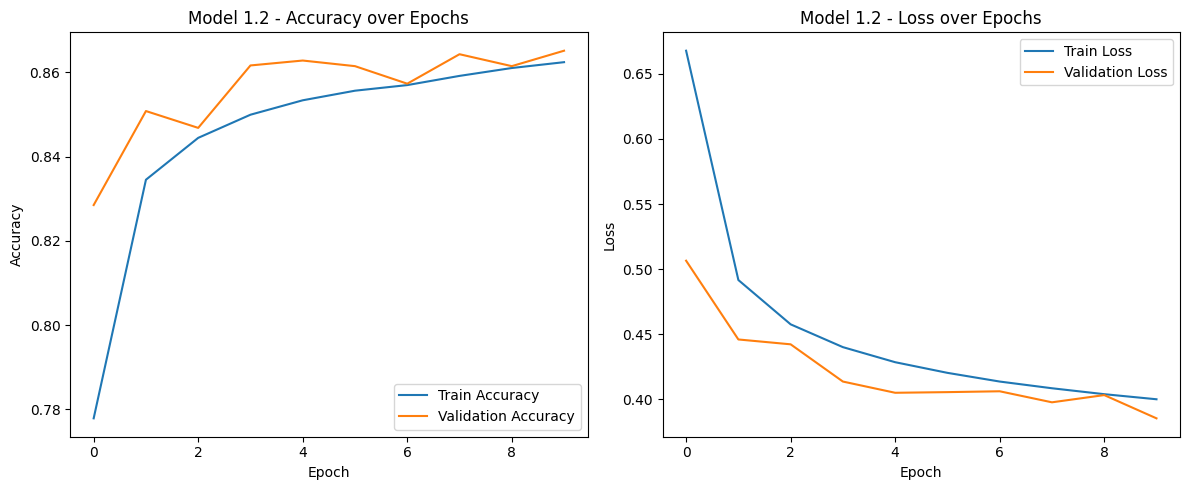


Model 1.2 Test Accuracy: 0.8456000089645386


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


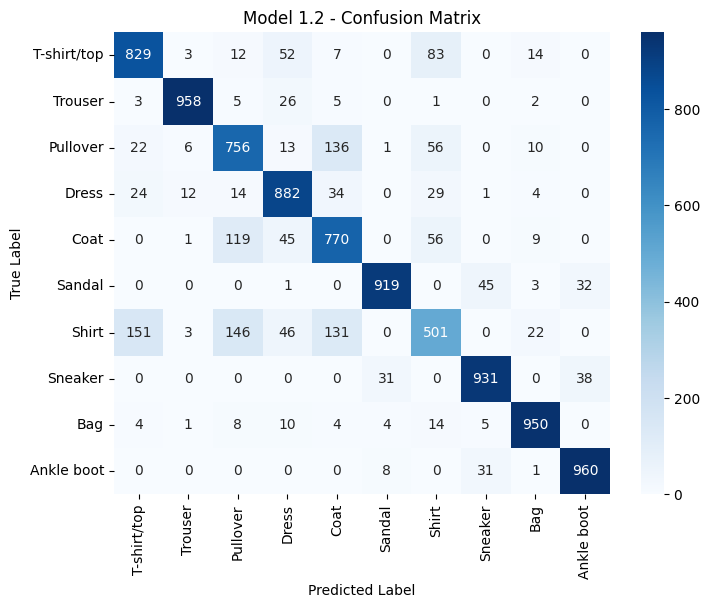



Classification Report for Model 1.2:

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.82      1000
     Trouser       0.97      0.96      0.97      1000
    Pullover       0.71      0.76      0.73      1000
       Dress       0.82      0.88      0.85      1000
        Coat       0.71      0.77      0.74      1000
      Sandal       0.95      0.92      0.94      1000
       Shirt       0.68      0.50      0.58      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.94      0.95      0.94      1000
  Ankle boot       0.93      0.96      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



In [ ]:
# Build Model 1.2
model1_2 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='softmax')
])

# Compile model 1.2 with Adam optimizer
model1_2.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Summary
model1_2.summary()
print("\n")

# Train model 1.2
history1_2 = model1_2.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1_2.history['accuracy'], label='Train Accuracy')
plt.plot(history1_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1.2 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1_2.history['loss'], label='Train Loss')
plt.plot(history1_2.history['val_loss'], label='Validation Loss')
plt.title('Model 1.2 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss1_2, test_accuracy1_2 = model1_2.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 1.2 Test Accuracy: {test_accuracy1_2}")
print("\n")

# Predict class labels
y_pred1_2 = model1_2.predict(x_test)
y_pred_classes1_2 = np.argmax(y_pred1_2, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm1_2 = confusion_matrix(y_true_classes, y_pred_classes1_2)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 1.2 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 1.2:\n")
print(classification_report(y_true_classes, y_pred_classes1_2, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4869 - loss: 1.5961 - val_accuracy: 0.7047 - val_loss: 0.8936
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7158 - loss: 0.8524 - val_accuracy: 0.7490 - val_loss: 0.7520
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7560 - loss: 0.7392 - val_accuracy: 0.7715 - val_loss: 0.6851
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7811 - loss: 0.6805 - val_accuracy: 0.7910 - val_loss: 0.6430
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.6410 - val_accuracy: 0.8013 - val_loss: 0.6132
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.6186 - val_accuracy: 0.8095 - val_loss: 0.5921
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.6000 - val_accuracy: 0.8145 - val_loss: 0.5737
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8071 - loss: 0.5862 - val_accuracy: 

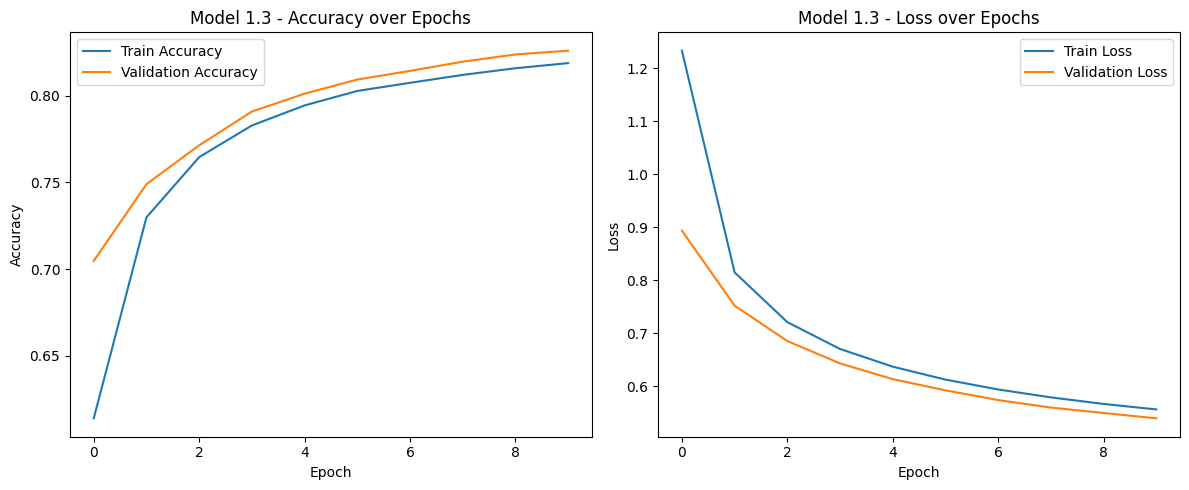


Model 1.3 Test Accuracy: 0.8057000041007996


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


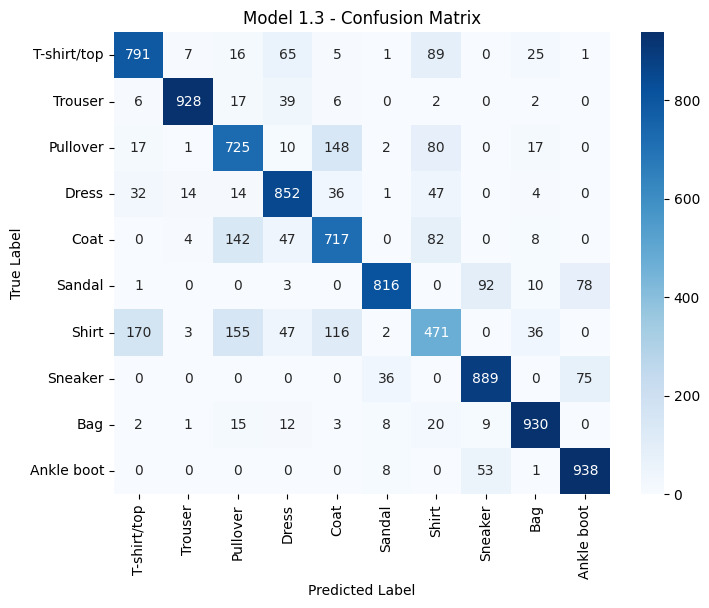



Classification Report for Model 1.3:

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.79      0.78      1000
     Trouser       0.97      0.93      0.95      1000
    Pullover       0.67      0.72      0.70      1000
       Dress       0.79      0.85      0.82      1000
        Coat       0.70      0.72      0.71      1000
      Sandal       0.93      0.82      0.87      1000
       Shirt       0.60      0.47      0.53      1000
     Sneaker       0.85      0.89      0.87      1000
         Bag       0.90      0.93      0.91      1000
  Ankle boot       0.86      0.94      0.90      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



In [ ]:
# Build Model 1.3
model1_3 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='softmax')
])

# Compile model 1.3 with SGD optimizer and custom learning rate
optimizer = SGD(learning_rate=0.01)
model1_3.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Summary
model1_3.summary()
print("\n")

# Train model 1.3
history1_3 = model1_3.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1_3.history['accuracy'], label='Train Accuracy')
plt.plot(history1_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1.3 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1_3.history['loss'], label='Train Loss')
plt.plot(history1_3.history['val_loss'], label='Validation Loss')
plt.title('Model 1.3 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss1_3, test_accuracy1_3 = model1_3.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 1.3 Test Accuracy: {test_accuracy1_3}")
print("\n")

# Predict class labels
y_pred1_3 = model1_3.predict(x_test)
y_pred_classes1_3 = np.argmax(y_pred1_3, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm1_3 = confusion_matrix(y_true_classes, y_pred_classes1_3)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_3, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 1.3 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 1.3:\n")
print(classification_report(y_true_classes, y_pred_classes1_3, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,650 (846.29 KB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7648 - loss: 13.9167 - val_accuracy: 0.8752 - val_loss: 0.4054
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8915 - loss: 0.3238 - val_accuracy: 0.8770 - val_loss: 0.3694
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9171 - loss: 0.2341 - val_accuracy: 0.8812 - val_loss: 0.3736
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - loss: 0.2023 - val_accuracy: 0.8877 - val_loss: 0.3904
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9339 - loss: 0.1841 - val_accuracy: 0.8790 - val_loss: 0.4175
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9402 - loss: 0.1705 - val_accuracy: 0.8840 - val_loss: 0.4167
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9432 - loss: 0.1591 - val_accuracy: 0.8783 - val_loss: 0.4985
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9459 - loss: 0.1516 - val_accuracy:

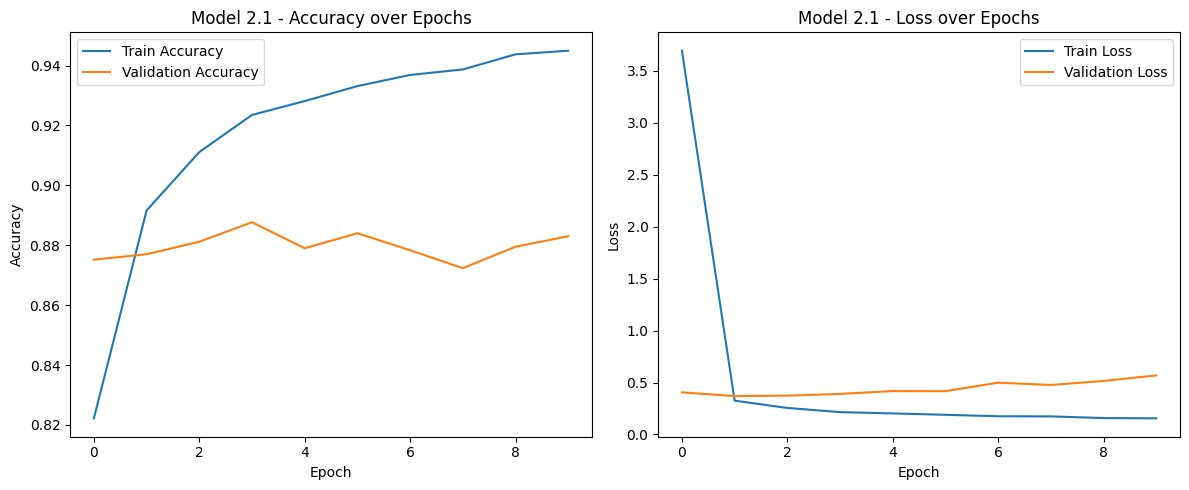


Model 2.1 Test Accuracy: 0.8701000213623047


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


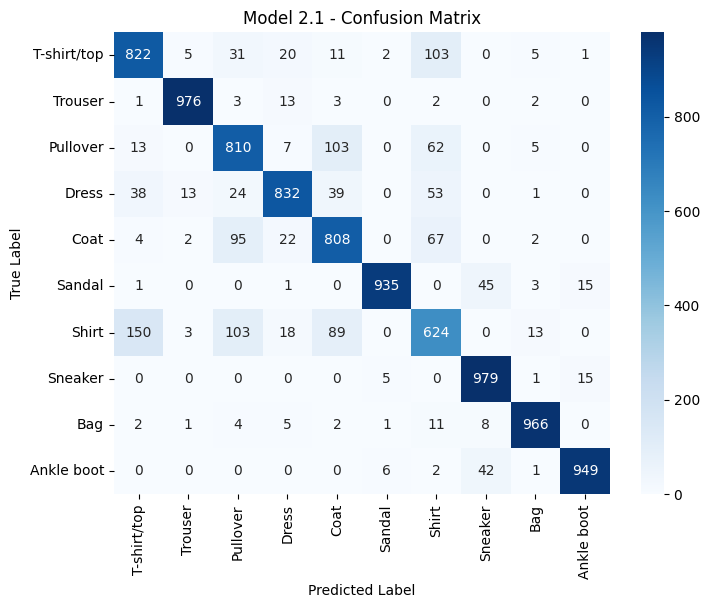



Classification Report for Model 2.1:

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.76      0.81      0.78      1000
       Dress       0.91      0.83      0.87      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.68      0.62      0.65      1000
     Sneaker       0.91      0.98      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
# Build Model 2.1
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile Model 2.1
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Summary
model2.summary()
print("\n")

# Train Model 2.1
history2 = model2.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2.1 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2.1 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 2.1 Test Accuracy: {test_accuracy2}")
print("\n")

# Predict class labels
y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm2 = confusion_matrix(y_true_classes, y_pred_classes2)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 2.1 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 2.1:\n")
print(classification_report(y_true_classes, y_pred_classes2, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,650 (846.29 KB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7716 - loss: 10.4820 - val_accuracy: 0.8677 - val_loss: 0.3839
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8674 - loss: 0.3924 - val_accuracy: 0.8747 - val_loss: 0.3779
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8739 - loss: 0.3707 - val_accuracy: 0.8738 - val_loss: 0.3615
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8752 - loss: 0.3692 - val_accuracy: 0.8708 - val_loss: 0.3643
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8749 - loss: 0.3694 - val_accuracy: 0.8747 - val_loss: 0.3919
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8797 - loss: 0.3592 - val_accuracy: 0.8705 - val_loss: 0.3725
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8771 - loss: 0.3631 - val_accuracy: 0.8757 - val_loss: 0.3723
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8769 - loss: 0.3683 - val_accuracy:

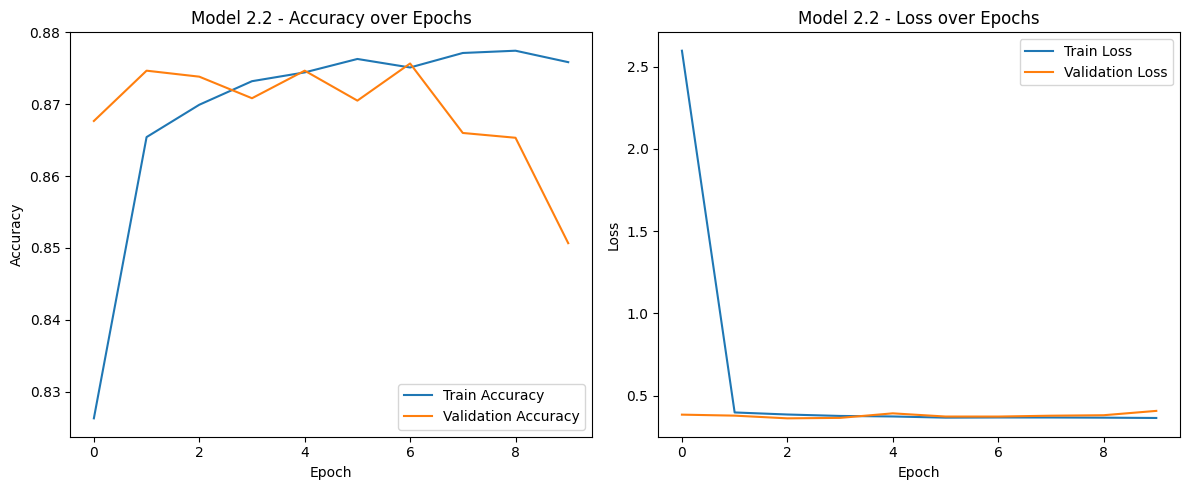


Model 2.2 Test Accuracy: 0.8414999842643738


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


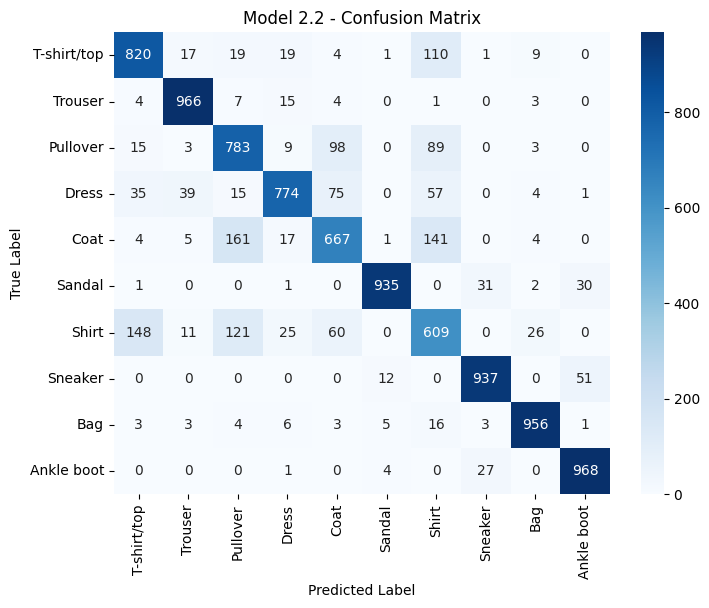



Classification Report for Model 2.2:

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.93      0.97      0.95      1000
    Pullover       0.71      0.78      0.74      1000
       Dress       0.89      0.77      0.83      1000
        Coat       0.73      0.67      0.70      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.60      0.61      0.60      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.95      0.96      0.95      1000
  Ankle boot       0.92      0.97      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
# Build Model 2.2
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile Model 2.2
model2.compile(optimizer=RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Summary
model2.summary()
print("\n")

# Train Model 2.2
history2 = model2.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2.2 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2.2 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 2.2 Test Accuracy: {test_accuracy2}")
print("\n")

# Predict class labels
y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm2 = confusion_matrix(y_true_classes, y_pred_classes2)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 2.2 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 2.2:\n")
print(classification_report(y_true_classes, y_pred_classes2, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,361,674 (9.01 MB)

 Trainable params: 2,361,674 (9.01 MB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7098 - loss: 7.4726 - val_accuracy: 0.8572 - val_loss: 0.3832
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8760 - loss: 0.3457 - val_accuracy: 0.8810 - val_loss: 0.3418
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8931 - loss: 0.2903 - val_accuracy: 0.8740 - val_loss: 0.3466
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9066 - loss: 0.2520 - val_accuracy: 0.8917 - val_loss: 0.3211
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9127 - loss: 0.2341 - val_accuracy: 0.8818 - val_loss: 0.3414
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9170 - loss: 0.2270 - val_accuracy: 0.8822 - val_loss: 0.3544
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9194 - loss: 0.2125 - val_accuracy: 0.8832 - val_loss: 0.3864
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9237 - loss: 0.2069 - val_accuracy: 

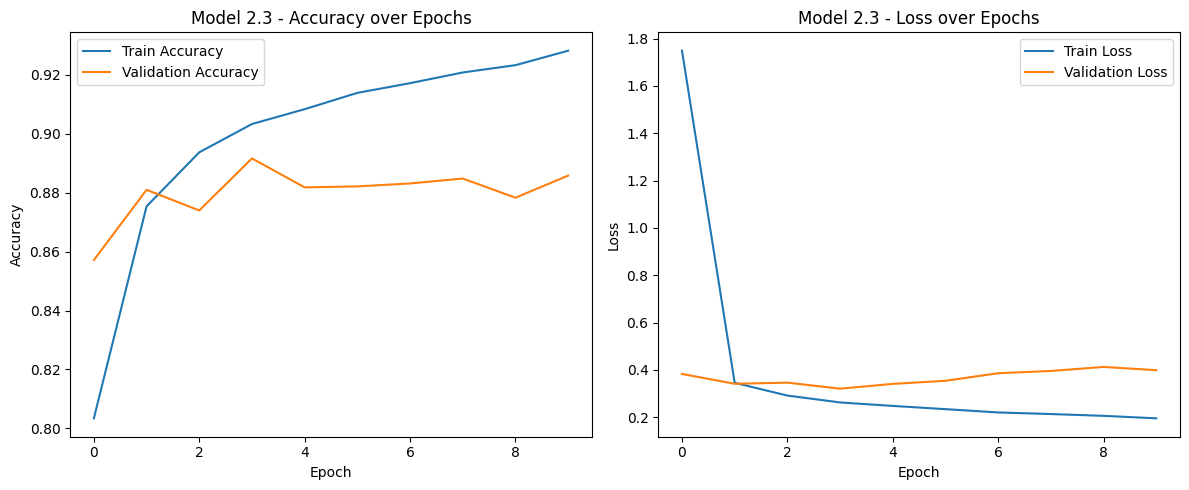


Model 2.3 Test Accuracy: 0.8729000091552734


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


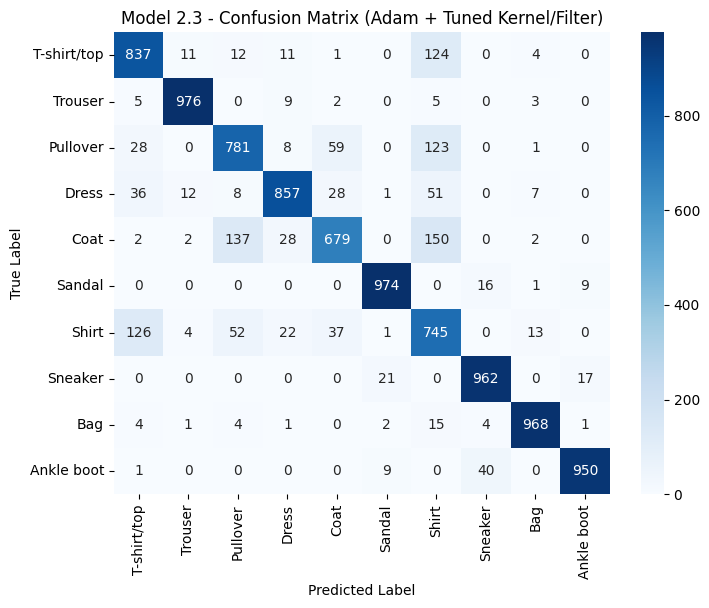



Classification Report for Model 2.3:

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.82      1000
     Trouser       0.97      0.98      0.97      1000
    Pullover       0.79      0.78      0.78      1000
       Dress       0.92      0.86      0.89      1000
        Coat       0.84      0.68      0.75      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.61      0.74      0.67      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
# Build Model 2.3
model2 = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Summary
model2.summary()
print("\n")

# Compile Model 2.3
model2.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 2.3
history2 = model2.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2.3 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2.3 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 2.3 Test Accuracy: {test_accuracy2}")
print("\n")

# Predict class labels
y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm2 = confusion_matrix(y_true_classes, y_pred_classes2)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 2.3 - Confusion Matrix (Adam + Tuned Kernel/Filter)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 2.3:\n")
print(classification_report(y_true_classes, y_pred_classes2, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7834 - loss: 3.5773 - val_accuracy: 0.8918 - val_loss: 0.3043
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9070 - loss: 0.2567 - val_accuracy: 0.9000 - val_loss: 0.2727
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9273 - loss: 0.1950 - val_accuracy: 0.9093 - val_loss: 0.2618
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9411 - loss: 0.1556 - val_accuracy: 0.9010 - val_loss: 0.2796
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9531 - loss: 0.1259 - val_accuracy: 0.9098 - val_loss: 0.2707
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9598 - loss: 0.1071 - val_accuracy: 0.9080 - val_loss: 0.3093
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9672 - loss: 0.0894 - val_accuracy: 0.9073 - val_loss: 0.3294
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9724 - loss: 0.0767 - val_accuracy: 

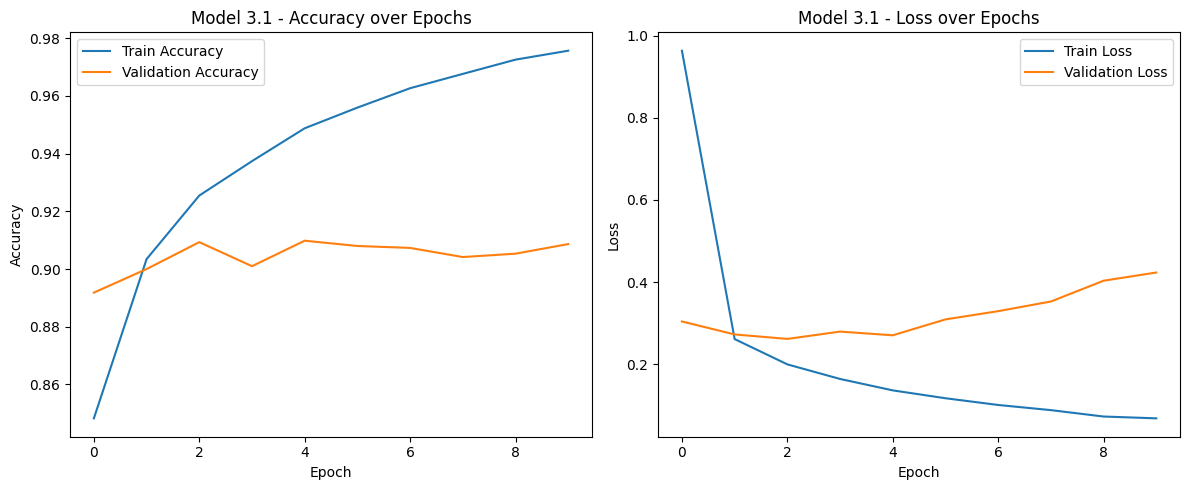


Model 3.1 Test Accuracy: 0.8960999846458435


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


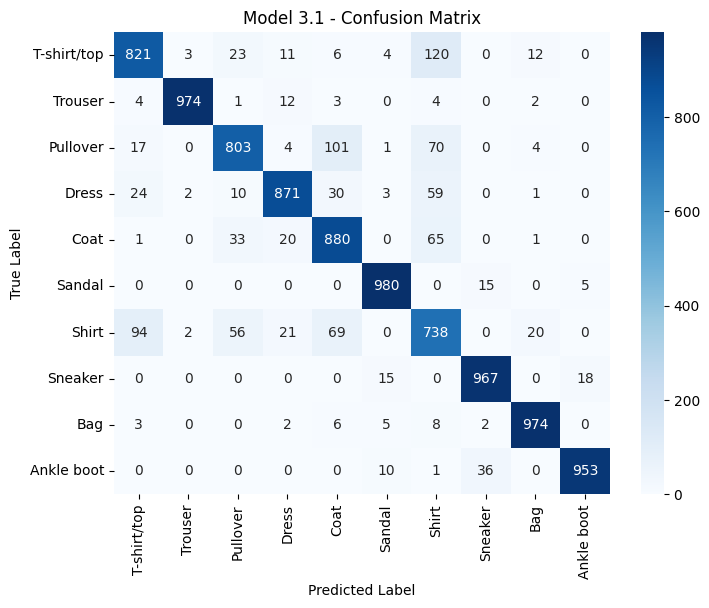



Classification Report for Model 3.1:

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.80      0.83      1000
       Dress       0.93      0.87      0.90      1000
        Coat       0.80      0.88      0.84      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.69      0.74      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Build Model 3.1
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model 3.1
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Summary
model3.summary()
print("\n")

# Train model 3.1
history3 = model3.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3.1 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3.1 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 3.1 Test Accuracy: {test_accuracy3}")
print("\n")

# Predict class labels
y_pred3 = model3.predict(x_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm3 = confusion_matrix(y_true_classes, y_pred_classes3)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 3.1 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 3.1:\n")
print(classification_report(y_true_classes, y_pred_classes3, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7920 - loss: 2.9834 - val_accuracy: 0.8952 - val_loss: 0.3036
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8920 - loss: 0.2983 - val_accuracy: 0.9065 - val_loss: 0.2649
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9104 - loss: 0.2497 - val_accuracy: 0.9097 - val_loss: 0.2634
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9235 - loss: 0.2201 - val_accuracy: 0.9090 - val_loss: 0.2595
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9271 - loss: 0.2062 - val_accuracy: 0.8942 - val_loss: 0.2996
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9328 - loss: 0.1881 - val_accuracy: 0.9113 - val_loss: 0.2800
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9380 - loss: 0.1760 - val_accuracy: 0.9183 - val_loss: 0.2985
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9425 - loss: 0.1687 - val_accuracy:

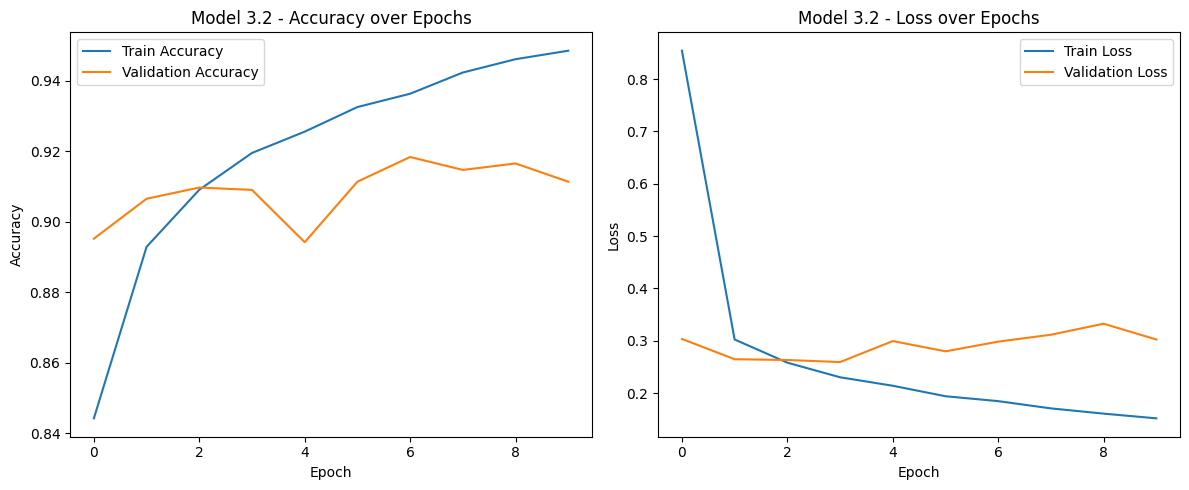


Model 3.2 Test Accuracy: 0.9016000032424927


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


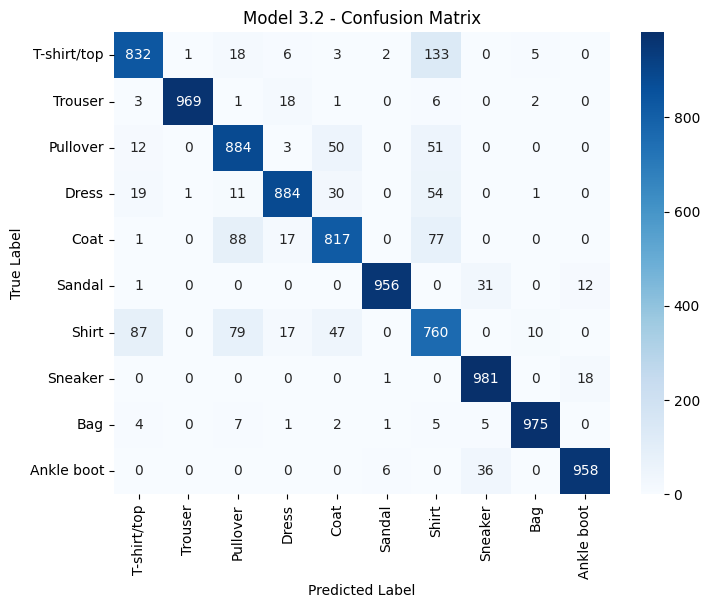



Classification Report for Model 3.2:

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.81      0.88      0.85      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.86      0.82      0.84      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.70      0.76      0.73      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Build Model 3.2
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Summary
model3.summary()
print("\n")

# Compile model 3.2 with RMSprop
model3.compile(optimizer=RMSprop(learning_rate=0.0005),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train model 3.2
history3 = model3.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3.2 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3.2 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 3.2 Test Accuracy: {test_accuracy3}")
print("\n")

# Predict class labels
y_pred3 = model3.predict(x_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm3 = confusion_matrix(y_true_classes, y_pred_classes3)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 3.2 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 3.2:\n")
print(classification_report(y_true_classes, y_pred_classes3, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │     3,965,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,060,426 (15.49 MB)

 Trainable params: 4,060,426 (15.49 MB)

 Non-trainable params: 0 (0.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.7905 - loss: 1.6503 - val_accuracy: 0.8933 - val_loss: 0.2903
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9052 - loss: 0.2603 - val_accuracy: 0.9097 - val_loss: 0.2515
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9260 - loss: 0.1943 - val_accuracy: 0.9198 - val_loss: 0.2336
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9408 - loss: 0.1549 - val_accuracy: 0.9217 - val_loss: 0.2233
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9529 - loss: 0.1231 - val_accuracy: 0.9247 - val_loss: 0.2246
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9630 - loss: 0.0992 - val_accuracy: 0.9302 - val_loss: 0.2173
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9700 - loss: 0.0835 - val_accuracy: 0.9232 - val_loss: 0.2466
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9735 - loss: 0.0698 - val_accura

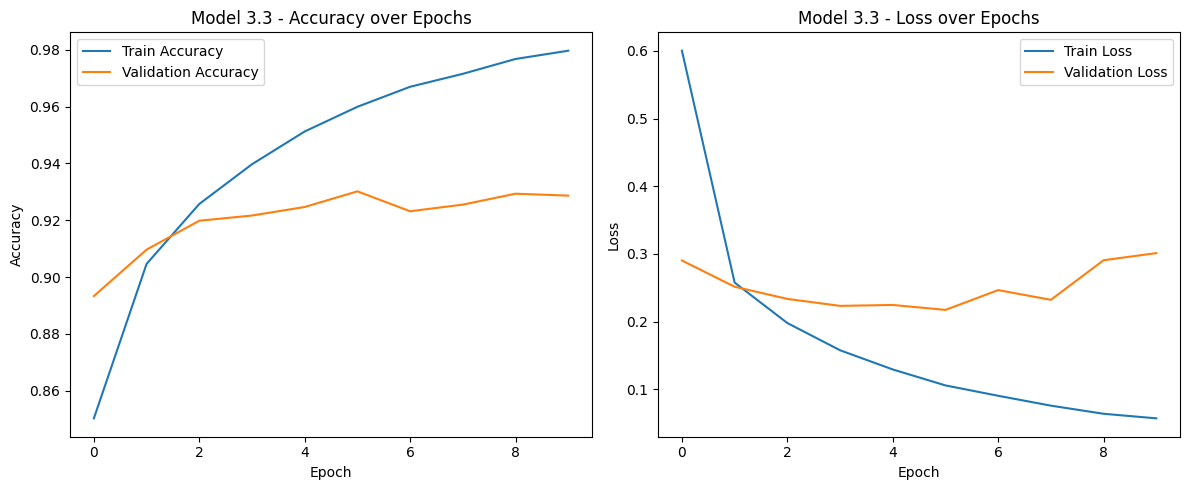


Model 3.3 Test Accuracy: 0.9180999994277954


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


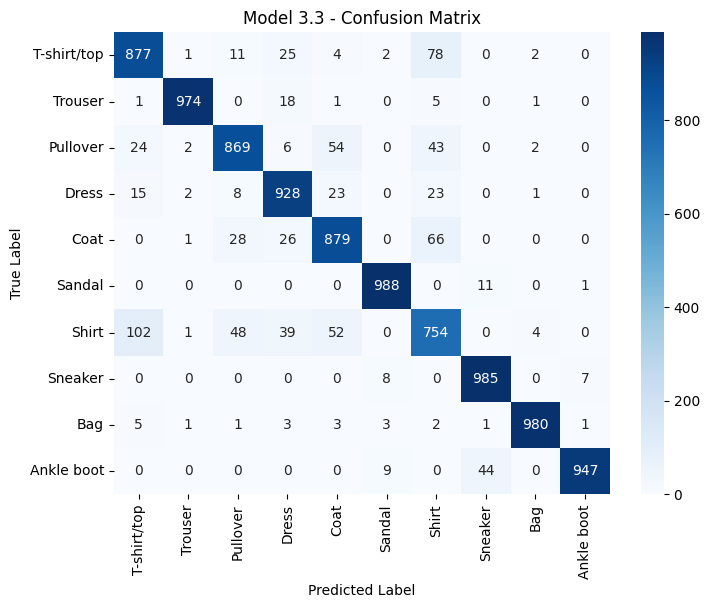



Classification Report for Model 3.3:

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.88      0.87      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.90      0.87      0.88      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.87      0.88      0.87      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.78      0.75      0.77      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
# Build Model 3.3
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Summary
model3.summary()
print("\n")

# Compile Model 3.3
model3.compile(optimizer=Adam(learning_rate=0.0005),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train Model 3.3
history3 = model3.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val_oh)
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3.3 - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model 3.3 - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nModel 3.3 Test Accuracy: {test_accuracy3}")
print("\n")

# Predict class labels
y_pred3 = model3.predict(x_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm3 = confusion_matrix(y_true_classes, y_pred_classes3)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Model 3.3 - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Model 3.3:\n")
print(classification_report(y_true_classes, y_pred_classes3, target_names=class_names))

In [ ]:
# Extra Task - Q2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │     23,550 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30)        │        120 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 30)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        930 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30)        │        120 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 30)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 814)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 10)        │      8,150 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 32,870 (128.40 KB)

 Trainable params: 32,750 (127.93 KB)

 Non-trainable params: 120 (480.00 B)



Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7325 - loss: 0.8008 - val_accuracy: 0.8552 - val_loss: 0.4259
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8399 - loss: 0.4618 - val_accuracy: 0.8615 - val_loss: 0.3973
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8489 - loss: 0.4304 - val_accuracy: 0.8662 - val_loss: 0.3860
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8560 - loss: 0.4080 - val_accuracy: 0.8648 - val_loss: 0.3813
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8570 - loss: 0.4021 - val_accuracy: 0.8628 - val_loss: 0.3821
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8613 - loss: 0.3963 - val_accuracy: 0.8700 - val_loss: 0.3661
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8624 - loss: 0.3840 - val_accuracy: 0.8753 - val_loss: 0.3554
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8658 - loss: 0.3768 - val_accuracy: 

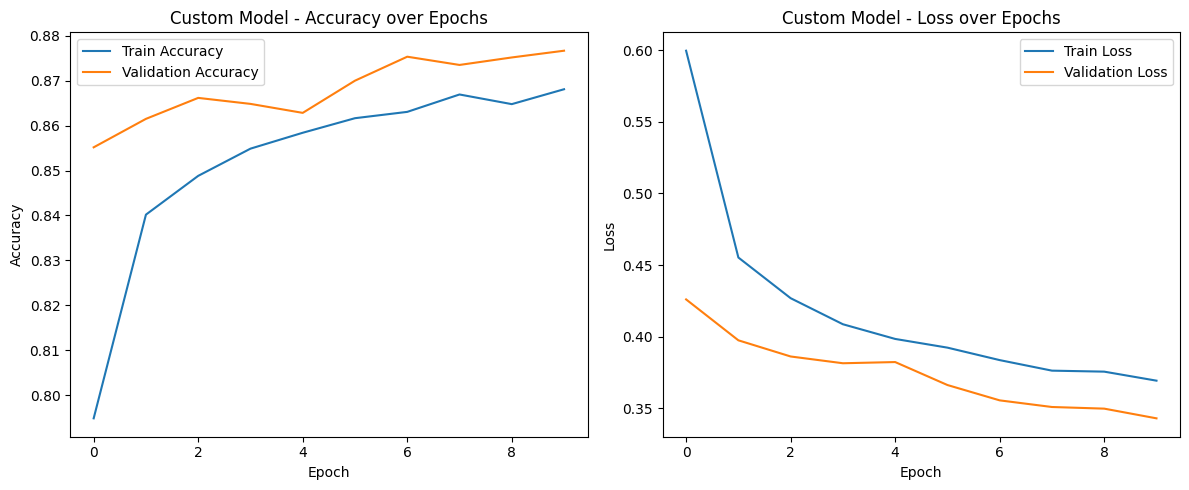


Custom Model - Test Accuracy: 0.8578000068664551


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


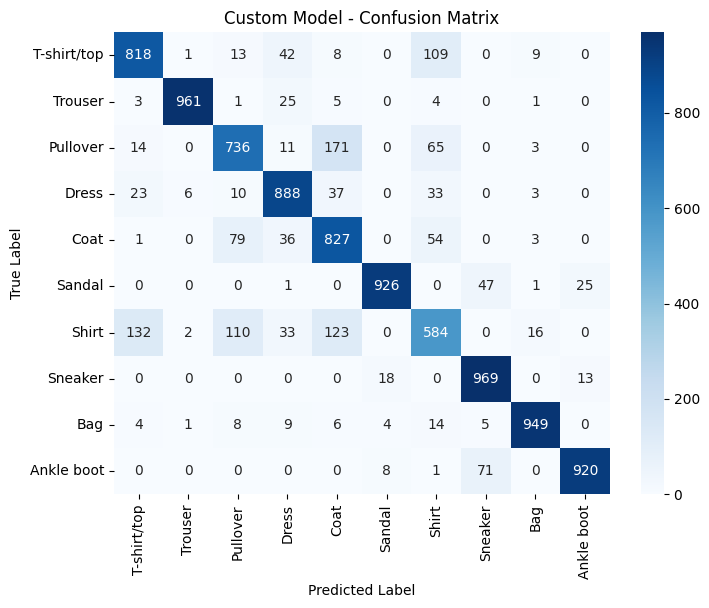



Classification Report for Custom Model:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.74      0.75      1000
       Dress       0.85      0.89      0.87      1000
        Coat       0.70      0.83      0.76      1000
      Sandal       0.97      0.93      0.95      1000
       Shirt       0.68      0.58      0.63      1000
     Sneaker       0.89      0.97      0.93      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.96      0.92      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# Load the dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full)

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode
y_train_oh = to_categorical(y_train, num_classes=10)
y_val_oh = to_categorical(y_val, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# Reshape image data to include a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define augmentation
datagen = ImageDataGenerator(
    rotation_range=15,           # Rotate images up to 15 degrees
    width_shift_range=0.1,       # Shift images horizontally by 10%
    height_shift_range=0.1,      # Shift images vertically by 10%
    zoom_range=0.1,              # Random zoom within 10%
    horizontal_flip=True         # Randomly flip images horizontally
)

# Fit on training data
datagen.fit(x_train)

# Input layer
input_layer = Input(shape=(28, 28, 1))
flattened = tf.keras.layers.Flatten()(input_layer)

# First hidden layer with BatchNormalization and Dropout
hidden1 = Dense(30, activation="relu")(flattened)
hidden1 = BatchNormalization()(hidden1)
hidden1 = Dropout(0.3)(hidden1)

# Second hidden layer with BatchNormalization and Dropout
hidden2 = Dense(30, activation="relu")(hidden1)
hidden2 = BatchNormalization()(hidden2)
hidden2 = Dropout(0.3)(hidden2)

# Concatenate original input and second hidden layer
concat = Concatenate()([flattened, hidden2])

# Output layer
output = Dense(10, activation="softmax")(concat)

# Build the model
custom_model = Model(inputs=input_layer, outputs=output)

# Compile the model
custom_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Summary
custom_model.summary()
print("\n")

# Train the model
history = custom_model.fit(
    x_train, y_train_oh,
    validation_data=(x_val, y_val_oh),
    epochs=10,
    batch_size=64
)

# Plot training and validation accuracy/loss
print("\n")
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom Model - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Custom Model - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on the test set
test_loss, test_accuracy = custom_model.evaluate(x_test, y_test_oh, verbose=0)
print(f"\nCustom Model - Test Accuracy: {test_accuracy}")
print("\n")

# Predict class labels
y_pred = custom_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Custom Model - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\n")
print("Classification Report for Custom Model:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))